Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [60]:
import seaborn as sns

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

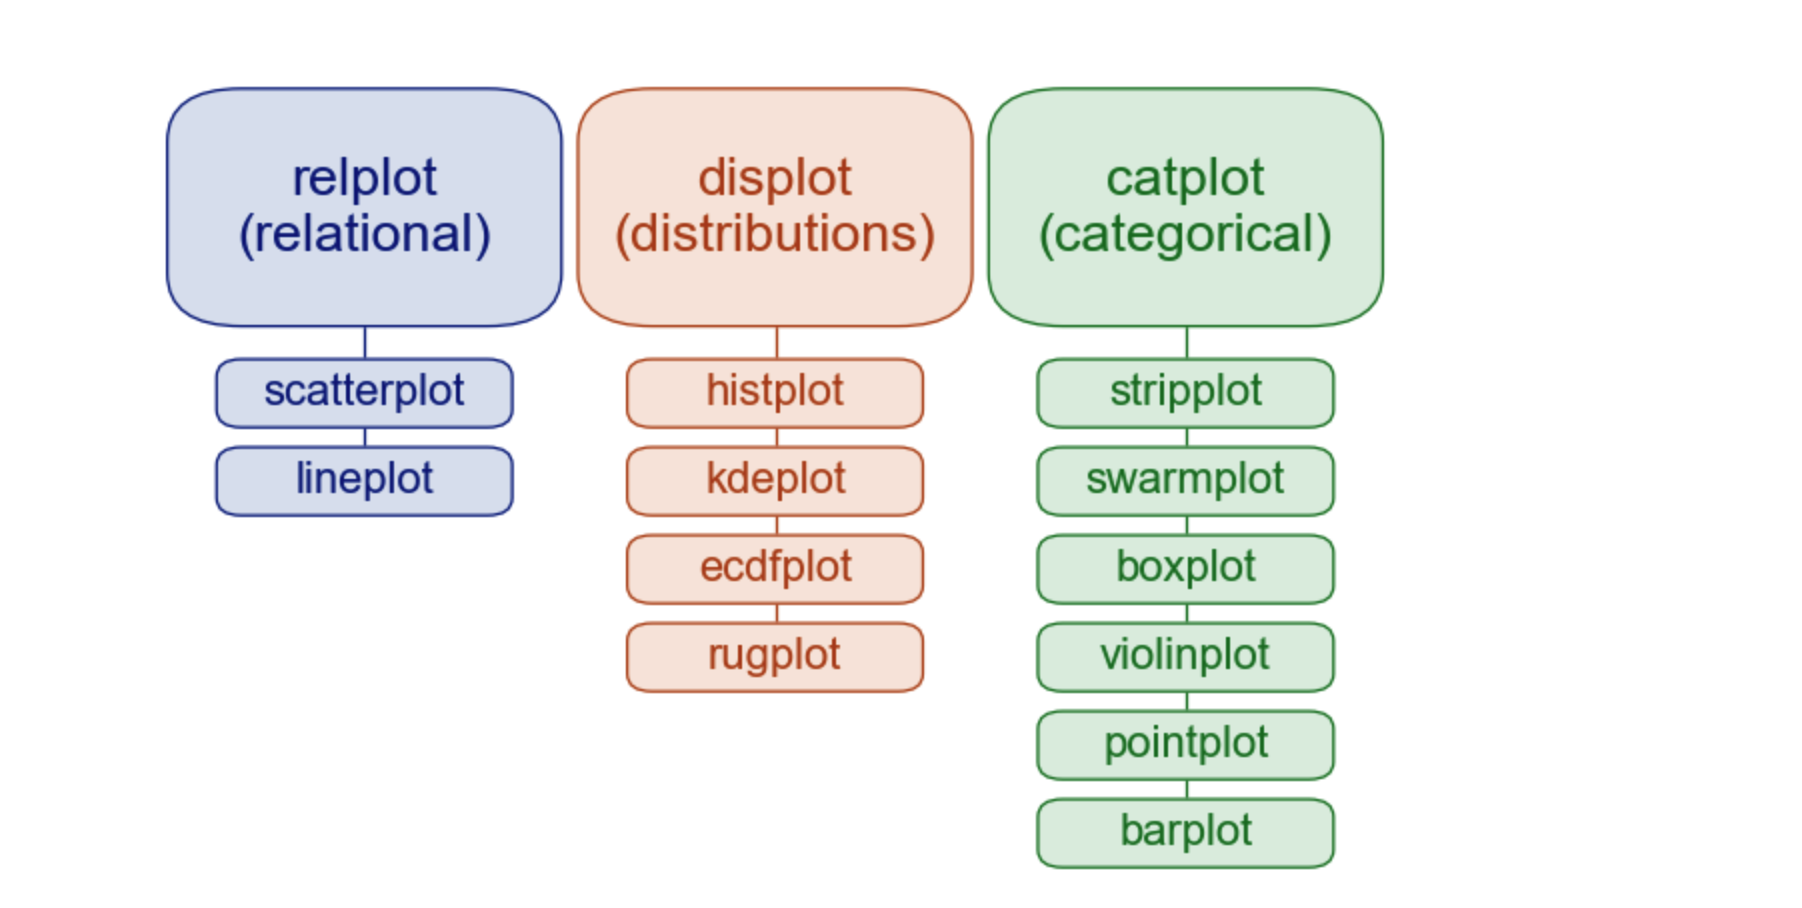

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [61]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [62]:
# Option 1 : Load directly from sns dataset using load_dataset
tips = sns.load_dataset('tips')

In [63]:
# Option 2: Load using pydataset
tips = data('tips')

In [64]:
# show_doc ?
data('tips', show_doc=True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [65]:
# check out our dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
# tips info
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [67]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

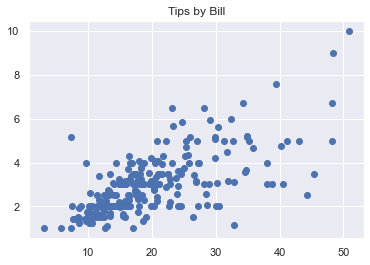

In [68]:
# scatterplot in matplotlib

plt.scatter(tips.total_bill, tips.tip)
plt.title('Tips by Bill')
plt.show()

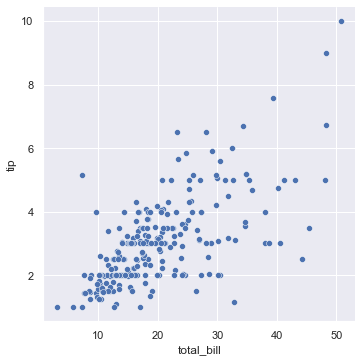

In [69]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x='total_bill', y='tip')

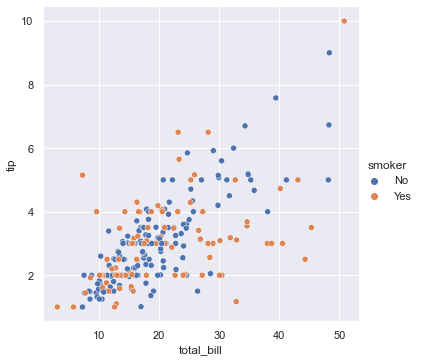

In [70]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x='total_bill', y='tip', hue='smoker')

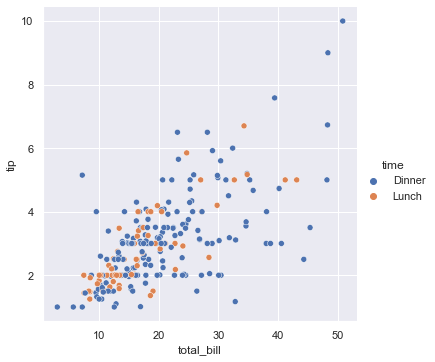

In [71]:
# using 'time' column as hue now
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'time')

seaborn.axisgrid.FacetGrid

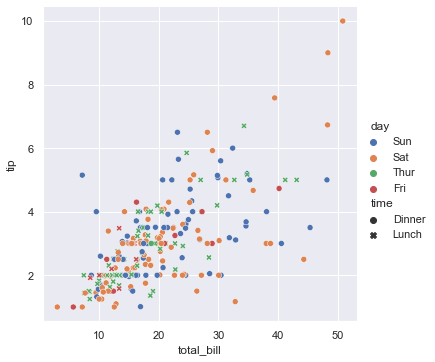

In [80]:
# Style argument: extra dimension
type(sns.relplot(
    data = tips,
    x = 'total_bill',
    y = 'tip',
    style = 'time',
    hue='day'))

matplotlib.axes._subplots.AxesSubplot

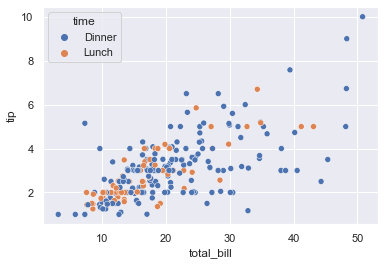

In [73]:
# scatterplot - returns an axes level object

type(sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'time'))

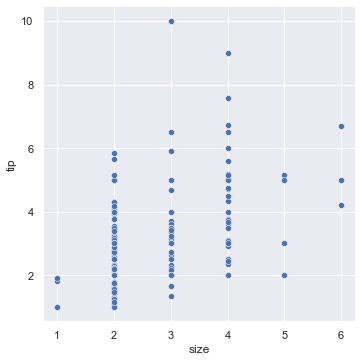

In [74]:
# relplot with discrete variable ('size')

sns.relplot(data = tips, x = 'size', y = 'tip')

## Kind

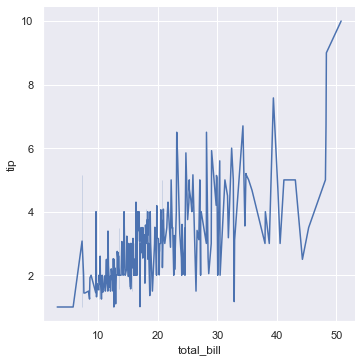

In [75]:
# lineplot - may not be appropriate in this case. Note use of 'kind' argument

sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind='line')

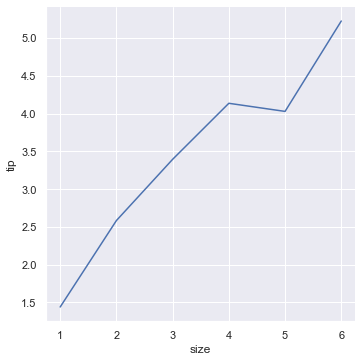

In [77]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line', ci=None)


https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

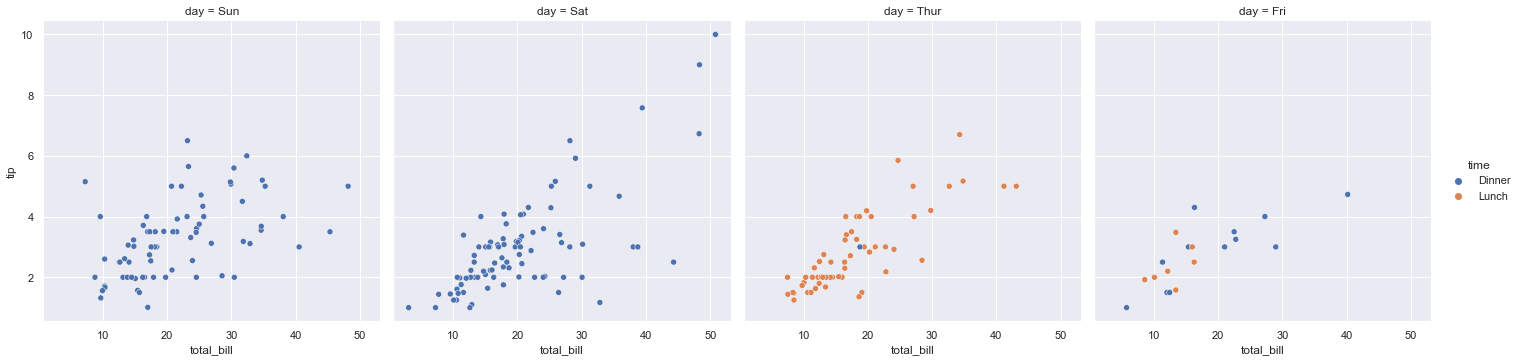

In [78]:
#  FacetGrid with 'col'
sns.relplot(data = tips, x = 'total_bill', y = 'tip',
            hue = 'time', col = 'day')

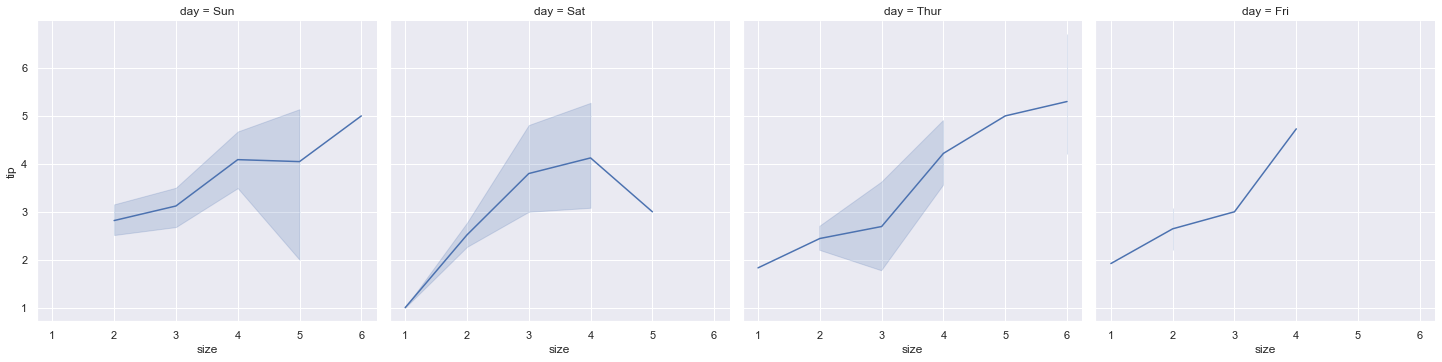

In [79]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line', col = 'day')

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


### Distributions

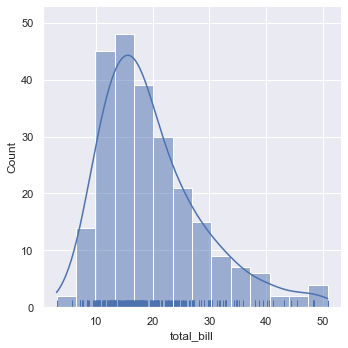

In [84]:
# displot (hist, kde, rug)

sns.displot(data = tips, x = 'total_bill', kde = True, rug = True)

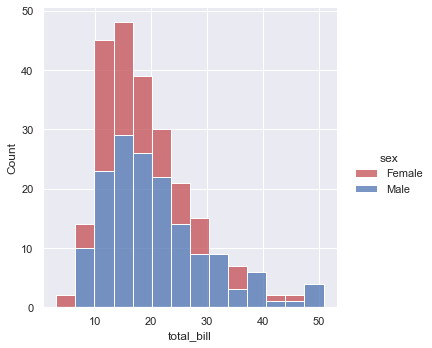

In [88]:
# histogram with hue and stacking
sns.displot(data = tips, x = 'total_bill', hue = 'sex', multiple = 'stack',
            palette = ['r', 'b'])

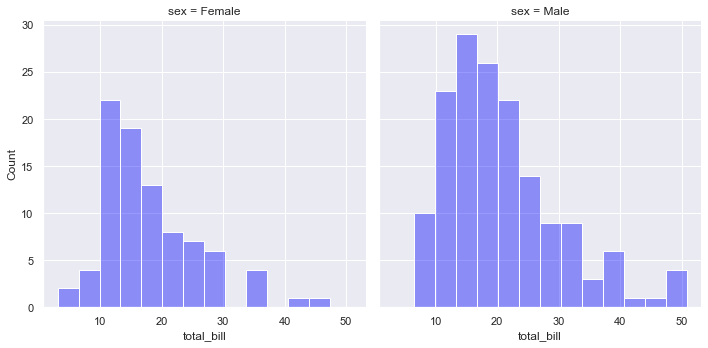

In [89]:
# use 'col' argument to create 'small multiples'

sns.displot(data = tips, x = 'total_bill', col = 'sex', color = 'blue', alpha = 0.4)

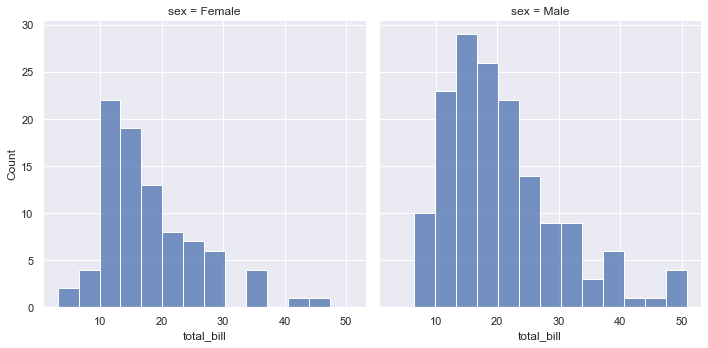

In [97]:
#histplot will return an axes level object

sns.displot(data = tips, x = 'total_bill', col = 'sex')

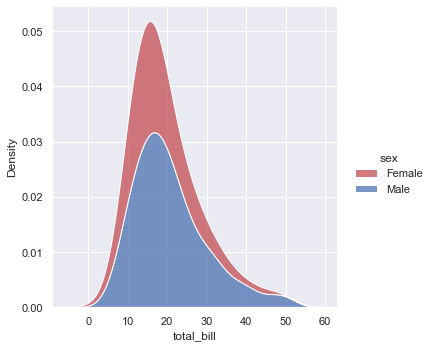

In [100]:
# kde = probability of finding a observartions at particular value of x.
# Smooth out version of histogram. Estimating probabilty density function (PDF) in a non-parametric way.

sns.displot(data = tips, x = 'total_bill', hue = 'sex', multiple = 'stack',
            palette = ['r', 'b'], kind = 'kde')

### Categorial Plots

#### Boxplots

In [104]:
sns.dogplot()

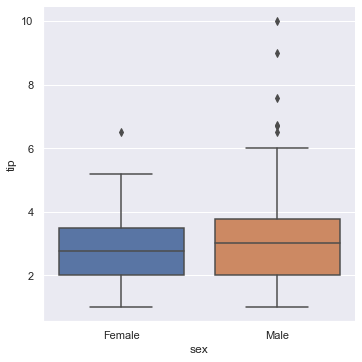

In [101]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object
sns.catplot(data = tips, y = 'tip', x= 'sex', kind = 'box')

In [106]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip', ylabel='time'>

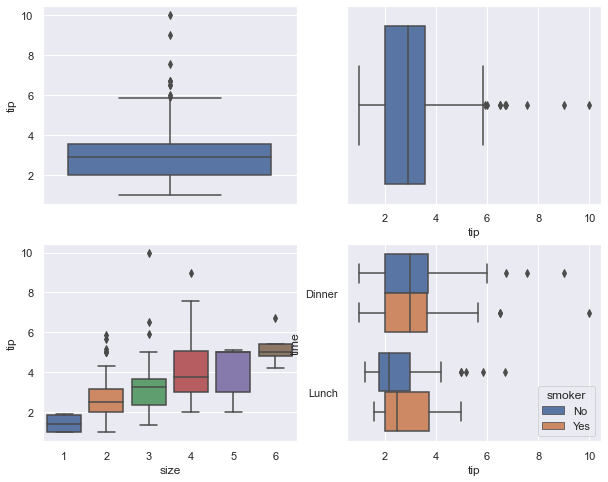

In [108]:
# create subplots
# plt.subplots instead of plt.subplot
# why? because we need the axis object

# we define the shape of our subplot figure : 2x2

# old method: plt.subplot(2,2,1)

fig, ax = plt.subplots(2,2, figsize = (10,8))

# rather than 1-4, treat the dimensions as typical python zero-indexed lists
sns.boxplot(data = tips, y = 'tip', ax = ax[0,0])

sns.boxplot(data = tips, x = 'tip', ax = ax[0,1])

sns.boxplot(data = tips, y = 'tip', x = 'size', ax = ax[1,0])

sns.boxplot(data = tips, x = 'tip', y = 'time', hue = 'smoker', ax = ax[1,1])

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

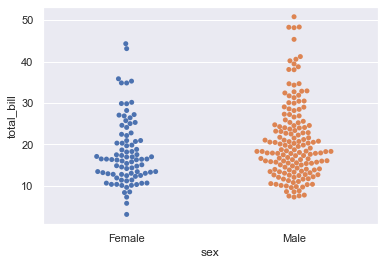

In [109]:
# swarmplot
sns.swarmplot(data = tips, y = 'total_bill', x = 'sex')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

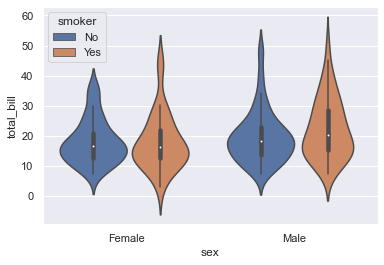

In [110]:
# violin plot
sns.violinplot(data = tips, y = 'total_bill', x = 'sex', hue = 'smoker')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

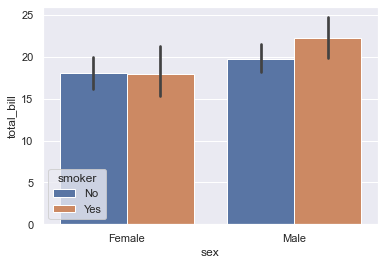

In [111]:
# bar plot. Shows mean for each category instead with CI
sns.barplot(data = tips, y = 'total_bill', x = 'sex', hue = 'smoker')

#### Pairplot

In [112]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

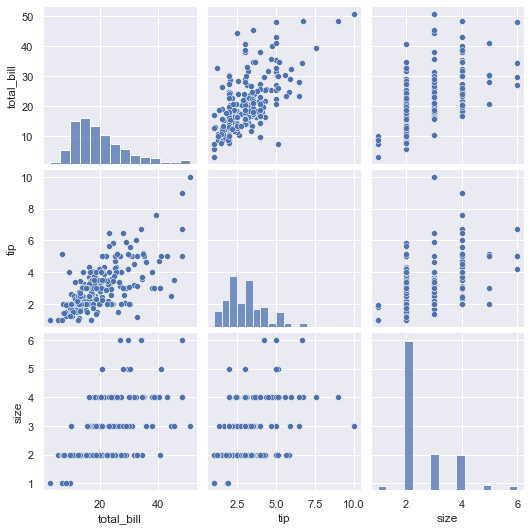

In [113]:
# pairplot for whole dataframe

sns.pairplot(tips)

# if you have a large amount of data:
# remember .sample()!!!!

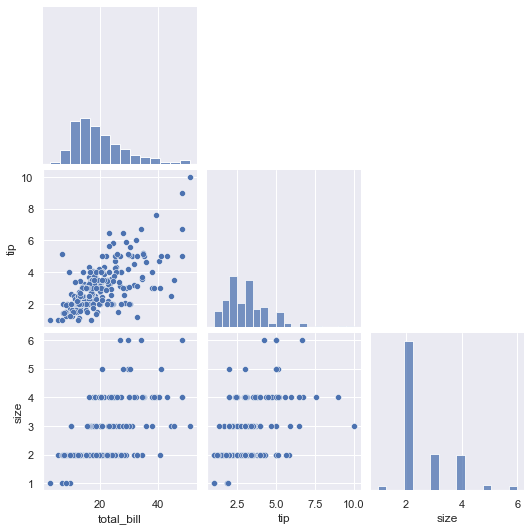

In [114]:
# argument corner = True will not render duplicate plots
sns.pairplot(tips, corner = True)

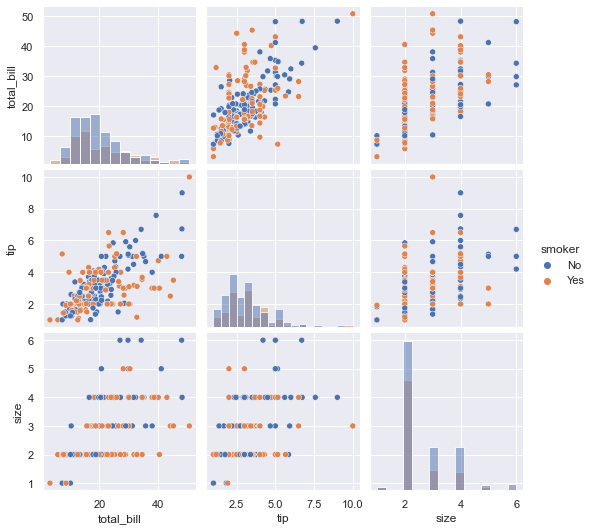

In [115]:
# use hue argument to visualize relationship based of different categories
sns.pairplot(tips, hue = 'smoker', diag_kind = 'hist')

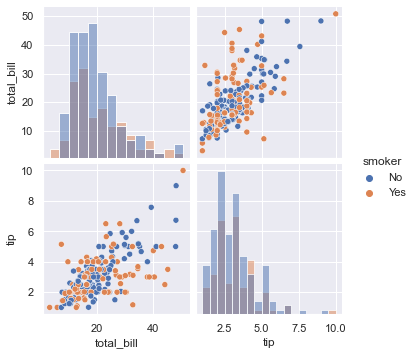

In [117]:
# we can limit the number of variable to plot using vars argument
sns.pairplot(tips, hue = 'smoker', vars = ['total_bill', 'tip'],diag_kind = 'hist')

#### Jointplot

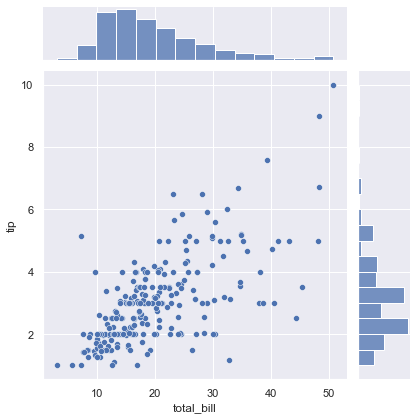

In [118]:
# joint plot
sns.jointplot(data = tips, x = 'total_bill', y = 'tip')

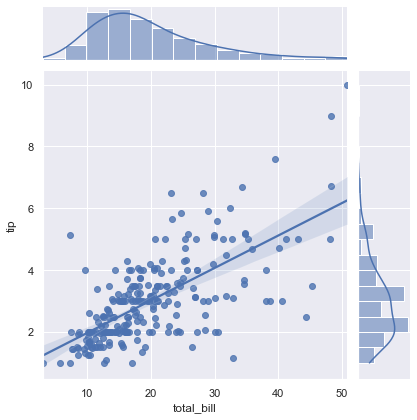

In [119]:
# jointplot with regression line
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

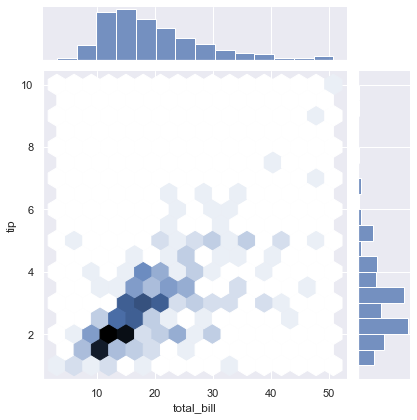

In [120]:
# joint plot with hex
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')

#### Heatmap

In [122]:
#crosstab
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

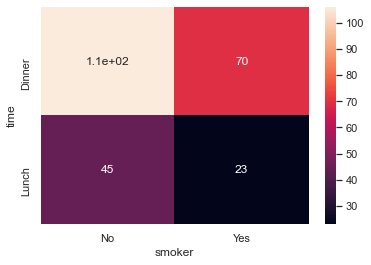

In [124]:
#create a heatmap

sns.heatmap(ctab, annot = True)

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

In [125]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [126]:
# correlation

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [127]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

<AxesSubplot:>

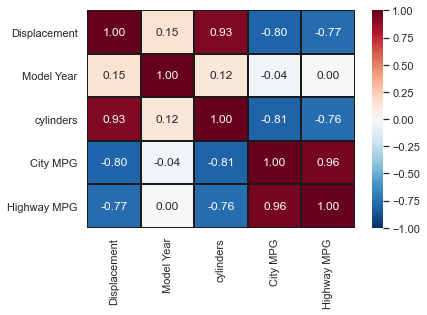

In [128]:
# heatmap for correlation table above
sns.heatmap(mpg.corr(),
            cmap = 'RdBu_r',
           vmax = 1,
            vmin = -1, 
            center = 0,
           linewidth = 1,
            linecolor = 'k',
            annot = True,
            fmt = '.2f',
           xticklabels = labels, yticklabels=labels)